# Vancouver Housing Market #

This code will preform machine learning techniques to extract information from the vancouver housing market. 

The goal of the project is to accuretly predict the cost of living in certain regions of vancouver. 

Secondly I would like to be able to idetify pentential scams. i.e. good to be true type situations

lastly, I want to make this publicly avaible through some hosting website. I need to learn more, but I beleive google has a hosting service. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Data ####

this data was extracted using another code I wrote.

This code is working at the moment, but there are certain things I would like to improve. I.e. take data every day to accumulate data over time. 

In [2]:
df = pd.read_csv("craigslist_scraper_1.csv")
df.head()

,latitude,longitude,accuracy,bed,bath,sqft,price,name
0,49.262554,-123.090692,5,1,1.0,544,1850,July is Free! 1 Bed / 1 bath - Boutique Building
1,49.299000,-123.140800,25,0,1.0,550,1350,Studio Apartment for RENT in Vancouver Downtow...
2,49.264753,-123.109464,23,1,1.0,454,1950,Olympic Village / False Creek 1 BEDROOM
3,49.281485,-123.126488,5,1,1.0,549,1975,"In-suite laundry, Bike Storage, LVP flooring"
4,49.249100,-123.208800,25,1,1.0,603,2000,"COVID Relief Offered! 1 BEDROOM, 1 BATHROOM UN..."


In [3]:
df.info()
housing = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   2772 non-null   float64
 1   longitude  2772 non-null   float64
 2   accuracy   2772 non-null   int64  
 3   bed        2772 non-null   int64  
 4   bath       2772 non-null   float64
 5   sqft       2772 non-null   int64  
 6   price      2772 non-null   int64  
 7   name       2772 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 173.4+ KB


In [4]:
housing.drop_duplicates(subset = "name", keep=False,inplace = True)
housing.isnull().values.any()

False

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852 entries, 0 to 2766
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1852 non-null   float64
 1   longitude  1852 non-null   float64
 2   accuracy   1852 non-null   int64  
 3   bed        1852 non-null   int64  
 4   bath       1852 non-null   float64
 5   sqft       1852 non-null   int64  
 6   price      1852 non-null   int64  
 7   name       1852 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 130.2+ KB


In [6]:
housing['accuracy']=housing['accuracy'].astype(float)
housing['bed']=housing['bed'].astype(float)
housing['sqft']=housing['sqft'].astype(float)
housing['price']=housing['price'].astype(float)

In [7]:
housing.head()

,latitude,longitude,accuracy,bed,bath,sqft,price,name
0,49.262554,-123.090692,5.0,1.0,1.0,544.0,1850.0,July is Free! 1 Bed / 1 bath - Boutique Building
1,49.299000,-123.140800,25.0,0.0,1.0,550.0,1350.0,Studio Apartment for RENT in Vancouver Downtow...
2,49.264753,-123.109464,23.0,1.0,1.0,454.0,1950.0,Olympic Village / False Creek 1 BEDROOM
3,49.281485,-123.126488,5.0,1.0,1.0,549.0,1975.0,"In-suite laundry, Bike Storage, LVP flooring"
4,49.249100,-123.208800,25.0,1.0,1.0,603.0,2000.0,"COVID Relief Offered! 1 BEDROOM, 1 BATHROOM UN..."


#### Plots ####

These first plots indicate that, the max price is 2000 this is what the data extraction program was degsigned to do. I want to further expand this later on, to encompass all rental property listen on craigslist.

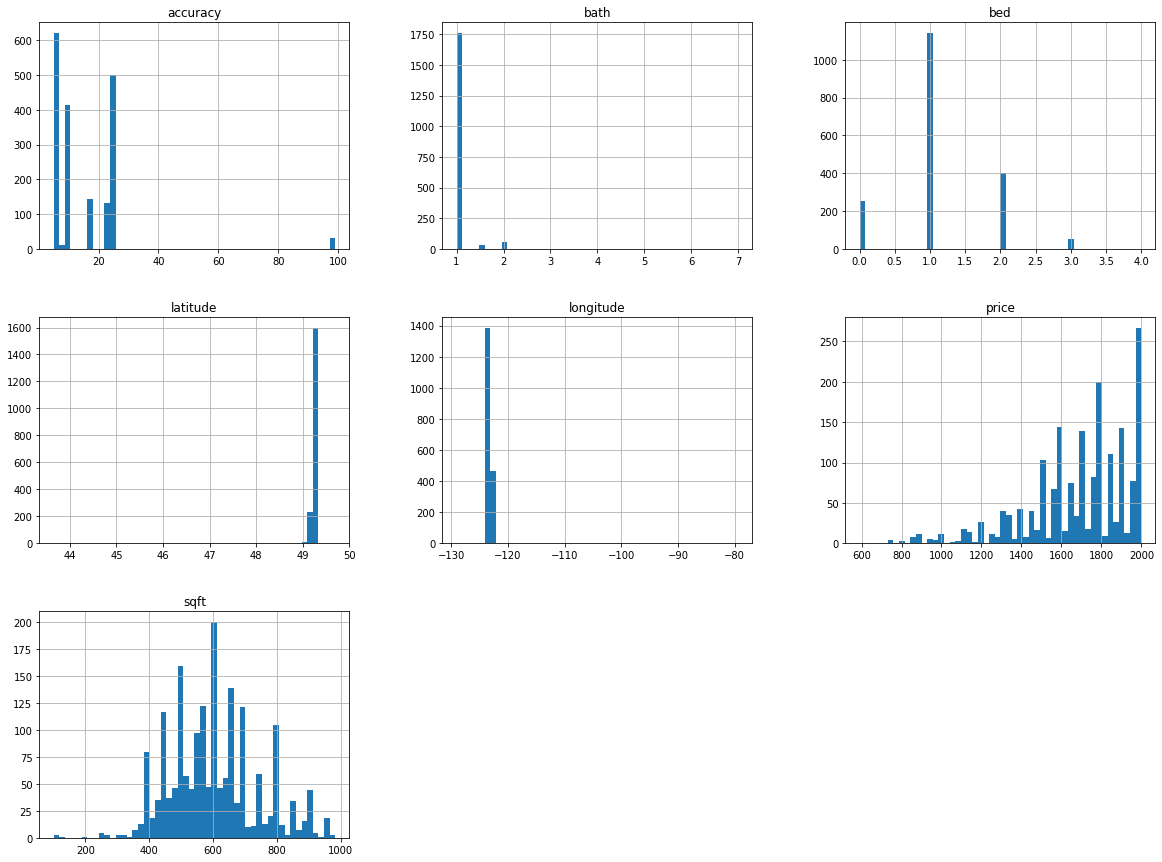

In [8]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Create a Test Set #

After the preiliminary observation, I will split the data into training and test data.

Using a random state of 42 to ensure we split the data the same way each time.

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size = 0.2,random_state = 42)

#### Sample Bias ####

since we have a small data set, we might run into a sample bias. To combat this as best as possible, cut the data into a price catagory. 

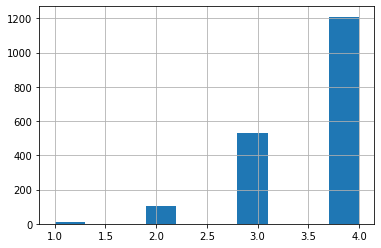

In [10]:
housing["price_cat"] = pd.cut(housing["price"],bins =[0.0,800.0,1200.0,1600.0,2000.0,np.inf],labels=[1,2,3,4,5])
housing["price_cat"].hist()

In [11]:

housing.reset_index(drop=True,inplace=True)
housing.head()


,latitude,longitude,accuracy,bed,bath,sqft,price,name,price_cat
0,49.262554,-123.090692,5.0,1.0,1.0,544.0,1850.0,July is Free! 1 Bed / 1 bath - Boutique Building,4
1,49.299000,-123.140800,25.0,0.0,1.0,550.0,1350.0,Studio Apartment for RENT in Vancouver Downtow...,3
2,49.264753,-123.109464,23.0,1.0,1.0,454.0,1950.0,Olympic Village / False Creek 1 BEDROOM,4
3,49.281485,-123.126488,5.0,1.0,1.0,549.0,1975.0,"In-suite laundry, Bike Storage, LVP flooring",4
4,49.249100,-123.208800,25.0,1.0,1.0,603.0,2000.0,"COVID Relief Offered! 1 BEDROOM, 1 BATHROOM UN...",4


#### stratified sampling ####

stratify the data to get a well distributed train/test dataset with hopfully no bias occuring. 

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

#NOtE: this data needs to have the index reset! else it will give an error.
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing,housing["price_cat"]):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [13]:
start_test_set["price_cat"].value_counts()

4    242
3    106
2     21
1      2
5      0
Name: price_cat, dtype: int64

In [14]:
start_test_set["price_cat"].value_counts() / len(start_test_set)

4    0.652291
3    0.285714
2    0.056604
1    0.005391
5    0.000000
Name: price_cat, dtype: float64

the precent distribution of the cost of rent, is well distributed for the test set data.

#### Reset data

here im just removing the price_cat beause i want the data to look like the original set. 

In [15]:
for set_ in (start_train_set, start_test_set):
    set_.drop("price_cat",axis=1, inplace=True)

# Visulize the Data #

since we have geographical information, we can plot this on a graph to see what it looks like. 

In [16]:
housing = start_train_set.copy()

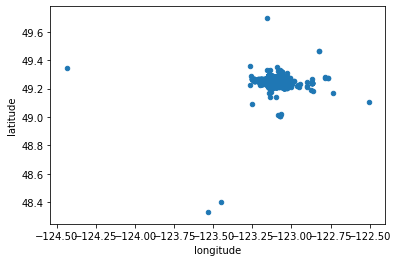

In [17]:
housing.plot(kind="scatter",x="longitude",y="latitude")

#### Refine Data ####

need to remove data that is not within the vancouver area. This will be based on lat a long quardinates

In [32]:
for latitude in housing["latitude"]:
    if latitude < 49.19 or latitude > 49.3:
        x = housing.index[housing["latitude"] == latitude].tolist()
        housing.drop([x[0]],axis=0,inplace=True)
for longitude in housing["longitude"]:
    if longitude > -123.00 or longitude < -123.25:
        y = housing.index[housing["longitude"] == longitude].tolist()
        
        housing.drop([y[0]],axis=0,inplace=True)
    

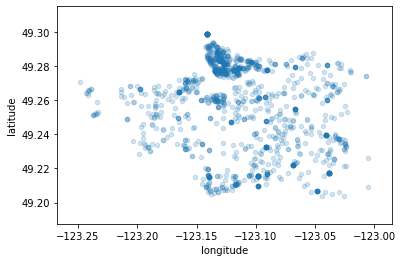

In [35]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.2)

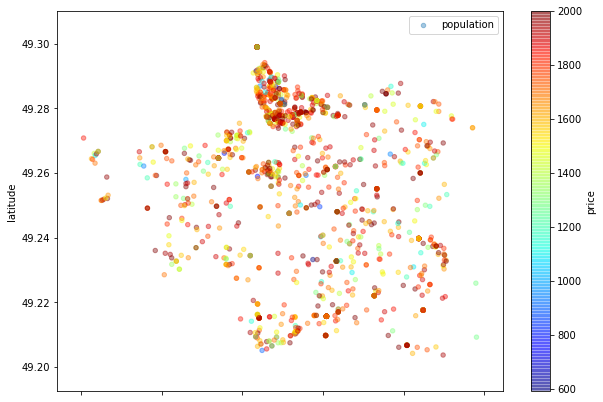

In [36]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4, 
             label = "population", figsize=(10,7),
            c="price",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()